# Import Config


In [2]:
# Load the YAML file
# Import config
import yaml
from torchvision.transforms import RandomRotation,GaussianBlur,ColorJitter
from autoSSL.evaluate import eval_KNN,eval_linear,eval_KNNplot,pipe_collate
from autoSSL.models import BarlowTwins, BYOL, MoCo, SimCLR, SimSiam, VICReg ,pipe_model 
from autoSSL.utils import embedding_feature,ck_callback,dict2transformer,join_dir,ContinuousCSVLogger  
from autoSSL.data import PipeDataset
from autoSSL.train import Trainer
import pytorch_lightning as pl

# with open('../experiment/global.yaml', 'r') as file:
#     config = yaml.safe_load(file)
with open('../experiment/global_m1.yaml', 'r') as file:
    config = yaml.safe_load(file)


# Define global view function
SSL_augmentation = {
    'RandomResizedCrop': {'size': (64, 64)},
    'RandomApply':{'transforms':[RandomRotation(degrees=90)], 'p':0.8},
    'RandomHorizontalFlip': {'p': 0.5},
    'RandomVerticalFlip':  {'p':0.5},
    'RandomApply':{'transforms': [ColorJitter(brightness=0.04,contrast=0.04,saturation=0.02,hue=0.01)], 'p':0.8},
    'RandomGrayscale' :{'p':0.2},
    'RandomSolarize':{'threshold':128, 'p':0.1},
    'RandomApply':{'transforms':[GaussianBlur(kernel_size=3,sigma=(0.2, 2))],'p':0.8},
    'ToTensor': {},
    'Normalize': {"mean": [0.485, 0.456, 0.406], "std": [0.229, 0.224, 0.225]}
}



# Import the dataset
_for training_

In [15]:
# loading training dataset
pipe_data_train= PipeDataset(input_dir=config["path_to_train_cifar10"], 
      augmentation=dict2transformer(SSL_augmentation,view=config["view"]), 
      samples=config["samples"], batch_size=config["batch_size"], shuffle=config["shuffle"], 
      drop_last=config["drop_last"], num_workers=config["num_workers"] 
    ) 
        
        

#### Lets Explore the dataset

In [16]:

print(f".pipe_data :{len(pipe_data_train)}")     # get dataset class
pipe_data_train[2]


.pipe_data :50000


([tensor([[[-0.6109, -0.6109, -0.6109,  ..., -0.3541, -0.3541, -0.3541],
           [-0.6109, -0.6109, -0.6109,  ..., -0.3541, -0.3541, -0.3541],
           [-0.6109, -0.6109, -0.6109,  ..., -0.3541, -0.3541, -0.3541],
           ...,
           [ 1.0673,  1.0673,  1.0673,  ...,  0.4166,  0.4166,  0.4166],
           [ 1.0673,  1.0673,  1.0673,  ...,  0.4166,  0.4166,  0.4166],
           [ 1.0673,  1.0673,  1.0673,  ...,  0.4166,  0.4166,  0.4166]],
  
          [[-0.8277, -0.8277, -0.8277,  ..., -0.8277, -0.8452, -0.8452],
           [-0.8277, -0.8277, -0.8277,  ..., -0.8277, -0.8452, -0.8452],
           [-0.8277, -0.8277, -0.8277,  ..., -0.8277, -0.8452, -0.8452],
           ...,
           [ 0.8529,  0.8529,  0.8704,  ..., -1.3529, -1.3529, -1.3529],
           [ 0.8529,  0.8529,  0.8704,  ..., -1.3529, -1.3529, -1.3529],
           [ 0.8529,  0.8529,  0.8704,  ..., -1.3529, -1.3529, -1.3529]],
  
          [[-1.1944, -1.1944, -1.1944,  ..., -1.1596, -1.1596, -1.1596],
           

#### Lets check and plot the augmentation with two views

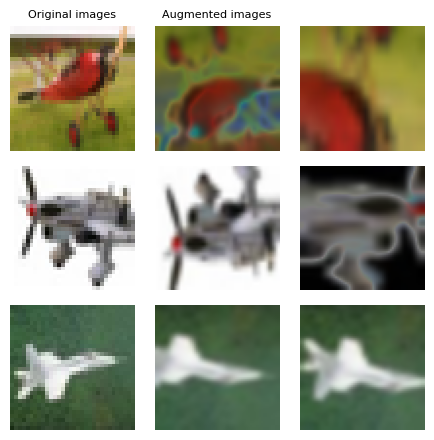

In [17]:

pipe_data_train.plot([2,3,4])


#### If you want to get a dataloader or dataset (for pytorch class)

In [18]:

pipe_data_train.dataloader  # get dataloader  
print(f".dataset :{len(pipe_data_train.dataset)}")     # get dataset class


.dataset :50000


#### If you want to get a narray list (for sklearning)

In [19]:
temp=pipe_data_train.array
print(f".array :{len(temp)}")       #get array.
print(f".array[0] :{len(temp[0])}")       #get array.

100%|██████████| 98/98 [00:39<00:00,  2.48it/s]


.array :3
.array[0] :2


# Create a Model

In [20]:

# List of model names
model_list = ["MoCo", "BYOL", "SimCLR", "SimSiam", "BarlowTwins", "VICReg"]
backbones =  ["resnet18", "resnet18_pretrained", "resnet50", "resnet50_pretrained", 
             "efficientnet_b5", "efficientnet_b5_pretrained", "mobilenet_v3", 
             "mobilenet_v3_pretrained", "vit_64", "vit_224"]
prjhead_dims = [None, 512, 1024]
stop_gradients = [False, True]
prjhead_dims = [None, 512, 1024]

model=pipe_model(name=model_list[0], backbone=backbones[0], stop_gradient=stop_gradients[0], prjhead_dim=prjhead_dims[1])


# Training the data

In [21]:
epoches=[2,4,6]
# accelerators=["cpu","cuda"]

trainer = pl.Trainer(
    max_epochs=epoches[0],accelerator=config["device"], 
    callbacks=[ck_callback("your_dir_save_log")],
    logger=ContinuousCSVLogger(save_dir="your_dir_save_log",name="my_log")
)



#for train
trainer.fit(model, pipe_data_train.dataloader)  


# FOR LOAD PREVIOUS WEIGHT
#trainer.fit(pmodel, pdata.dataloader,ckpt_path="your_dir_save_log//checkpoints-epoch=02-train_loss=20.89.ckpt"))  



GPU available: True (mps), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
/Users/marv/Documents/uni/cv_proj/own_repos/VICReg-BarlowTwins-Ablation-Study/.venv/lib/python3.10/site-packages/pytorch_lightning/callbacks/model_checkpoint.py:615: UserWarning: Checkpoint directory /Users/marv/Documents/uni/cv_proj/own_repos/VICReg-BarlowTwins-Ablation-Study/Tutorial_for_library/your_dir_save_log exists and is not empty.
  rank_zero_warn(f"Checkpoint directory {dirpath} exists and is not empty.")

  | Name                     | Type               | Params
----------------------------------------------------------------
0 | backbone                 | Sequential         | 11.2 M
1 | projection_head          | MoCoProjectionHead | 328 K 
2 | backbone_momentum        | Sequential         | 11.2 M
3 | projection_head_momentum | MoCoProjectionHead | 328 K 
4 | criterion                | NTXentLoss         | 0     
----------

Epoch 1: 100%|██████████| 98/98 [00:56<00:00,  1.73it/s, v_num=2]

`Trainer.fit` stopped: `max_epochs=2` reached.


Epoch 1: 100%|██████████| 98/98 [00:56<00:00,  1.73it/s, v_num=2]


# Evaluate the model
_by loading the test dataset and evaluating the model with a linear classifier, the test set get split into a training and testing batch with a split ratio of 80% / 20% for evaluation_

In [26]:
# Define global view function
test_augmentation = {
    'RandomResizedCrop': {'size': (64, 64)},
    'ToTensor': {},
    'Normalize': {"mean": [0.485, 0.456, 0.406], "std": [0.229, 0.224, 0.225]}
}

pipe_data_test=PipeDataset(
    input_dir= config["path_to_test_cifar10"], 
    samples=1000, 
    augmentation=dict2transformer(test_augmentation), 
    batch_size=32,
    shuffle=True,
    #collate_fn=collate_fn,
    drop_last=True,
    num_workers=4,

) 

#eval_linear(pipe_data_test,models=model,test=pipe_data_test,device="cuda") 
# eval_linear(pipe_data_test,models=model,split=0.8,device=config["device"]) 

# eval_linear(
#     pipe_data=pipe_data_train,
#     models=model,
#     test= pipe_data_test,
#     device= config["device"]
# )
eval_linear(
    pipe_data=pipe_data_test,
    models=model,
    split=0.8,
    device= config["device"]
)
        


Load the training and testing dataset


100%|██████████| 1/1 [00:05<00:00,  5.96s/it]


[('model_0', 0.10416666666666667)]

## evalute using KNN
_using the test data, which will be split into a training and testing batch with a split ratio of 80%/20%_

In [28]:

# eval_KNN(pipe_data_train,embedding_model=model,split=0.8,device=config["device"]) 
# eval_KNN(
#     pipe_data=pipe_data_train,
#     embedding_model=model,
#     test=pipe_data_test,
#     device=config["device"]
# )
eval_KNN(
    pipe_data=pipe_data_test,
    embedding_model=model,
    split=0.8,
    device=config["device"]
)

Load the training dataset to array


100%|██████████| 25/25 [00:23<00:00,  1.06it/s]


Load the testing dataset to array


100%|██████████| 6/6 [00:23<00:00,  3.94s/it]


embedding the training dataset


100%|██████████| 7/7 [00:00<00:00,  7.74it/s]


embedding the test dataset


100%|██████████| 2/2 [00:00<00:00, 45.56it/s]


Training in downstream


0.109375

#### plotting of the nearest neighbors for a given number of randomly chosen samples
_by using only the test dataset_

In [27]:
eval_KNNplot(
    pipe_data_test= pipe_data_test,
    embedding_model=model,
    samples=1,
    device=config["device"]
)

Load the testing dataset to array


100%|██████████| 31/31 [00:23<00:00,  1.33it/s]


embedding the test dataset
